In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df_train = pd.read_csv('./datasets/cleaned_training_data_with_yearly_week.csv')

In [3]:
df_test = pd.read_csv('./datasets/test_merge_with_features_and_stores.csv')

In [4]:
y = df_train['Weekly_Sales']

In [5]:
y

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
421565     2487.80
421566     5203.31
421567    56017.47
421568     6817.48
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [6]:
X = df_train[['Store','Dept','Size','week']]

In [7]:
X

,Store,Dept,Size,week
0,1,1,151315,5
1,1,2,151315,5
2,1,3,151315,5
3,1,4,151315,5
4,1,5,151315,5
...,...,...,...,...
421565,45,93,118221,43
421566,45,94,118221,43
421567,45,95,118221,43
421568,45,97,118221,43


In [8]:
df_test['Date'] = pd.to_datetime(df_test['Date'])

In [9]:
df_test['week'] = df_test['Date'].dt.week

C:\Users\Thomas\AppData\Local\Temp/ipykernel_14544/3605282343.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_test['week'] = df_test['Date'].dt.week


In [10]:
df_test = df_test[X.columns]

In [11]:
df_test #input for PREDICTIONS

,Store,Dept,Size,week
0,1,1,151315,44
1,1,2,151315,44
2,1,3,151315,44
3,1,4,151315,44
4,1,5,151315,44
...,...,...,...,...
115059,45,93,118221,30
115060,45,94,118221,30
115061,45,95,118221,30
115062,45,97,118221,30


In [12]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))   #set the output range

X = sc.fit_transform(X)
df_test = sc.transform(df_test)

In [13]:
X

array([[0.        , 0.        , 0.63026734, 0.07843137],
       [0.        , 0.01020408, 0.63026734, 0.07843137],
       [0.        , 0.02040816, 0.63026734, 0.07843137],
       ...,
       [1.        , 0.95918367, 0.45113588, 0.82352941],
       [1.        , 0.97959184, 0.45113588, 0.82352941],
       [1.        , 0.98979592, 0.45113588, 0.82352941]])

In [14]:
df_test

array([[0.        , 0.        , 0.63026734, 0.84313725],
       [0.        , 0.01020408, 0.63026734, 0.84313725],
       [0.        , 0.02040816, 0.63026734, 0.84313725],
       ...,
       [1.        , 0.95918367, 0.45113588, 0.56862745],
       [1.        , 0.97959184, 0.45113588, 0.56862745],
       [1.        , 0.98979592, 0.45113588, 0.56862745]])

In [15]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X, y) 

RandomForestRegressor(n_estimators=10, random_state=42)

In [16]:
y_predict = regressor.predict(df_test)

In [17]:
df_test

array([[0.        , 0.        , 0.63026734, 0.84313725],
       [0.        , 0.01020408, 0.63026734, 0.84313725],
       [0.        , 0.02040816, 0.63026734, 0.84313725],
       ...,
       [1.        , 0.95918367, 0.45113588, 0.56862745],
       [1.        , 0.97959184, 0.45113588, 0.56862745],
       [1.        , 0.98979592, 0.45113588, 0.56862745]])

In [18]:
df_result = df_test = pd.read_csv('./datasets/test_merge_with_features_and_stores.csv')

In [19]:
df_result

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221


In [20]:
df_result['Weekly_Sales'] = y_predict

In [21]:
df_train_data = pd.read_csv('./datasets/train.csv')

<AxesSubplot:xlabel='Date'>

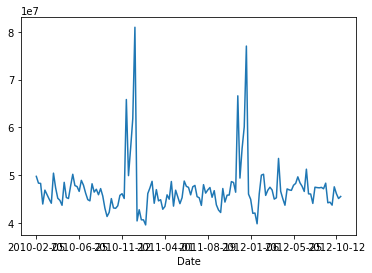

In [22]:
df_train_data.groupby('Date')['Weekly_Sales'].sum().plot()

<AxesSubplot:xlabel='Date'>

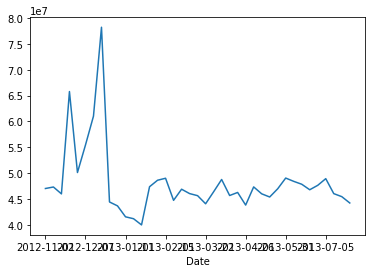

In [23]:
df_result.groupby('Date')['Weekly_Sales'].sum().plot()

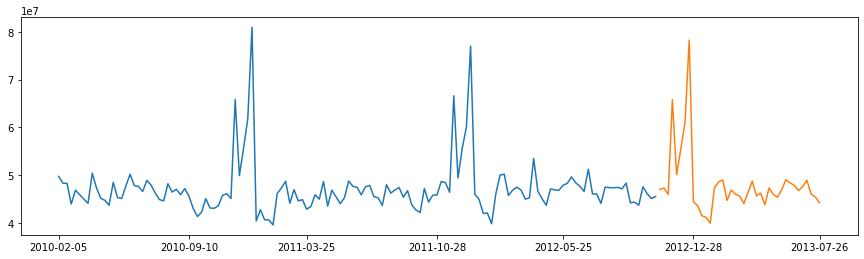

In [28]:
from matplotlib.dates import MonthLocator, DateFormatter
fig, ax = plt.subplots(figsize=(15,4))
plt.plot(df_train_data.groupby('Date')['Weekly_Sales'].sum())
plt.plot(df_result.groupby('Date')['Weekly_Sales'].sum())
#defines the tick location 
ax.xaxis.set_major_locator(MonthLocator())
#defines the label format

ax.tick_params(axis="x")

In [71]:
df_result.shape

(115064, 5)

In [72]:
df_result

,Store,Dept,Date,IsHoliday,Weekly_Sales
0,1,1,2012-11-02,False,36249.569667
1,1,1,2012-11-09,False,46553.784000
2,1,1,2012-11-16,False,9317.796150
3,1,1,2012-11-23,True,38541.718417
4,1,1,2012-11-30,False,27692.561000
...,...,...,...,...,...
115059,45,98,2013-06-28,False,3167.257733
115060,45,98,2013-07-05,False,4359.311500
115061,45,98,2013-07-12,False,53091.674033
115062,45,98,2013-07-19,False,6239.590000


<AxesSubplot:xlabel='Date'>

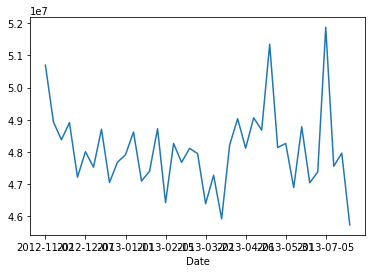

In [74]:
df_result.groupby('Date')['Weekly_Sales'].sum().plot()

In [75]:
df_original_train = pd.read_csv('./datasets/train.csv')

In [76]:
df_original_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [77]:
df_original_train = df_original_train[['Store','Dept','Date','IsHoliday','Weekly_Sales']]

In [79]:
df_combine = pd.concat([df_original_train,df_result])

<AxesSubplot:xlabel='Date'>

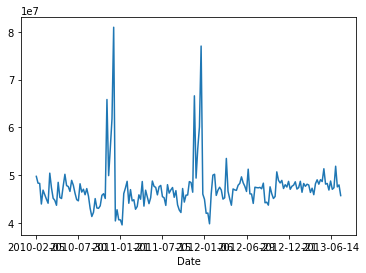

In [81]:
df_combine.groupby('Date')['Weekly_Sales'].sum().plot()

In [82]:
y

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
421565     2487.80
421566     5203.31
421567    56017.47
421568     6817.48
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [83]:
df_original_train['Weekly_Sales']

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

# Try using only part of the training data

In [97]:
#Splitting the data into training & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [101]:
X_train

,Store,Dept,Size,week
140387,15,80,123737,37
105652,11,20,207499,12
73498,8,31,155078,21
203354,21,11,140167,40
329039,34,56,158114,19
...,...,...,...,...
359783,38,91,39690,19
358083,38,21,39690,39
152315,16,34,57197,19
117952,13,51,219622,9


In [103]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))   #set the output range

X_train = sc.fit_transform(X_train)
#df_test has been rescaled

In [104]:
X_train

array([[0.31818182, 0.80612245, 0.48099293, 0.70588235],
       [0.22727273, 0.19387755, 0.93438053, 0.21568627],
       [0.15909091, 0.30612245, 0.65063573, 0.39215686],
       ...,
       [0.34090909, 0.33673469, 0.1208247 , 0.35294118],
       [0.27272727, 0.51020408, 1.        , 0.15686275],
       [0.70454545, 0.02040816, 0.9100662 , 0.58823529]])

In [105]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=10, random_state=42)

In [106]:
y_predict = regressor.predict(df_test)

C:\Users\Thomas\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: '2012-11-02'

In [107]:
df_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
